# Instructions for getting dataframe from RDS

```
get_batch_data(
    base_coin='ETH',
    quote_coin='BTC',
    start_time='2021-01-01',                  #YYYY-MM-DD
    end_time='2021-07-01',                    #YYYY-MM-DD
    columns=['close','close_30','close_100'], # any valid features with `_x` suffix support
    batch_size=1000000,                       # Large number to get everything
    extra_rows=10,                            # Fetch extra rows for custom feature engineering
    use_cache=False,                          # Cache can be used when current time > end_time
)

VALID_FEATURES = [
    'pair_id','open_time','close_time','dow','tod',
    'open','high','low','close',
    'number_of_trades','volume','quote_asset_volume','taker_buy_base_asset_volume','taker_buy_quote_asset_volume',
    'ma14','ma30','ma90',
    'sup14','sup30','sup90',
    'res14','res30','res90',
    'atr','atr_diff','atr_ma14',
    'rsi','rsi_diff','rsi_ma14',
    'trend_up','trend_up3','trend_up14','trend_up30',
    'cs_ss','cs_ssr','cs_hm','cs_hmr','cs_brh','cs_buh','cs_ebu','cs_ebr'
]
```

# Instructions for Manual Simulation

1. Decide on a name for your model.  Add first letter of your name and numbers as prefix  For example: `t0_dummy`.
2. Create a `.py` file with the name of your model in the `trade_models` directory (`./trade_models/t0_dummy.py`)
3. Import your model in `./trade_models/__init__.py` by adding `from . import t0_dummy`
4. Place any pre-trained models or scalers into the `./trade_models/assets/` directory with your model name as prefix.
5. Configure portfolio in the following cells.
    1. For `max_batch_size`, it is purely for memory considerations.  It does an SQL query per batch, so don't make it too small.
    2. Parameters inside portfolios are accessible inside the trade models
6. Run all

Sample portfolio (all fields must exist)
```
    {
        # Common parameters
        'portfolio_name' : f'ETH <-> BTC t0_dummy no fees',
        'trade_model' : 't0_dummy',      # name of the model to use
        'starting_coin' : 'ETH',         # aka the "base" coin
        'pair_coin' : 'BTC',             # aka the "quote" coin
        'max_batch_size' : 10000,        # how many entries to process per batch
        'starting_funds' : 16,           # amount of funds for starting coin
        'trading_fees_percent' : 0.1,    # trading fees in percent (0.1%)
        'trading_fees_buy' : 0.005,      # (0.005 ETH transaction fee to buy BTC)
        'trading_fees_sell' : 0.0004,    # (0.0004 BTC transaction fee to sell back to ETC)

        # Optional model specific parameteres
        'parameter_sample' : 'test',     # these variables are accessible in your model
    }
```

In [1]:
start_simulation = '2021-01-01' #YYYY-MM-DD
end_simulation = '2021-07-27' #YYYY-MM-DD

portfolios = [
#     {
#         'portfolio_name' : f'NM_ETHBTC_LogReg_1.29',
#         'trade_model' : 'n1_alpha1',
#         'starting_coin' : 'ETH',
#         'pair_coin' : 'BTC',
#         'max_batch_size' : 10000,
#         'extra_rows' : 0,
#         'starting_funds' : 1,
#         'trading_fees_percent' : 0.1,
#         'trading_fees_buy' : 0,
#         'trading_fees_sell' : 0,
#         'model_filepath': 'trade_models/assets/nm_lr_ethbtc_2108011147.pkl',
#         'model_use_atr' : True,
#         'model_ratio' : (2,1),
#         'model_reverse' : True,
#         'model_lookback_days' : 0,
#     },
#     {
#         'portfolio_name' : f'NM_ETHBTC_NaiveBayes_1.10',
#         'trade_model' : 'n1_alpha1',
#         'starting_coin' : 'ETH',
#         'pair_coin' : 'BTC',
#         'max_batch_size' : 10000,
#         'extra_rows' : 0,
#         'starting_funds' : 1,
#         'trading_fees_percent' : 0.1,
#         'trading_fees_buy' : 0,
#         'trading_fees_sell' : 0,
#         'model_filepath': 'trade_models/assets/nm_gnb_ethbtc_2108011401.pkl',
#         'model_use_atr' : True,
#         'model_ratio' : (4,2),
#         'model_reverse' : True,
#         'model_lookback_days' : 0,
#     },
#     {
#         'portfolio_name' : f'NM_ETHBTC_RandomForest_1.47',
#         'trade_model' : 'n1_alpha1',
#         'starting_coin' : 'ETH',
#         'pair_coin' : 'BTC',
#         'max_batch_size' : 10000,
#         'extra_rows' : 0,
#         'starting_funds' : 1,
#         'trading_fees_percent' : 0.1,
#         'trading_fees_buy' : 0,
#         'trading_fees_sell' : 0,
#         'model_filepath': 'trade_models/assets/nm_rf_ethbtc_2108011412.pkl',
#         'model_use_atr' : True,
#         'model_ratio' : (4,2),
#         'model_reverse' : True,
#         'model_lookback_days' : 3,
#     },
#     {
#         'portfolio_name' : f'NM_ETHBTC_RandomForest_1.09',
#         'trade_model' : 'n1_alpha1',
#         'starting_coin' : 'ETH',
#         'pair_coin' : 'BTC',
#         'max_batch_size' : 10000,
#         'extra_rows' : 0,
#         'starting_funds' : 1,
#         'trading_fees_percent' : 0.1,
#         'trading_fees_buy' : 0,
#         'trading_fees_sell' : 0,
#         'model_filepath': 'trade_models/assets/nm_rf_ethbtc_2108011445.pkl',
#         'model_use_atr' : True,
#         'model_ratio' : (4,1),
#         'model_reverse' : True,
#         'model_lookback_days' : 14,
#     },
#     {
#         'portfolio_name' : f'NM_ETHBTC_XGBoost_1.11',
#         'trade_model' : 'n1_alpha1',
#         'starting_coin' : 'ETH',
#         'pair_coin' : 'BTC',
#         'max_batch_size' : 10000,
#         'extra_rows' : 0,
#         'starting_funds' : 1,
#         'trading_fees_percent' : 0.1,
#         'trading_fees_buy' : 0,
#         'trading_fees_sell' : 0,
#         'model_filepath': 'trade_models/assets/nm_xgb_ethbtc_2108011541.pkl',
#         'model_use_atr' : True,
#         'model_ratio' : (4,1),
#         'model_reverse' : True,
#         'model_lookback_days' : 3,
#     },
#     {
#         'portfolio_name' : f'NM_ETHBTC_LogReg',
#         'trade_model' : 'n1_alpha1',
#         'starting_coin' : 'ETH',
#         'pair_coin' : 'BTC',
#         'max_batch_size' : 10000,
#         'extra_rows' : 0,
#         'starting_funds' : 1,
#         'trading_fees_percent' : 0.1,
#         'trading_fees_buy' : 0,
#         'trading_fees_sell' : 0,
#         'model_filepath': 'trade_models/assets/nm_lr_ethbtc_2108021545.pkl',
#         'model_use_atr' : False,
#         'model_ratio' : (0.01,0.005),
#         'model_reverse' : True,
#         'model_lookback_days' : 14,
#     },
#     {
#         'portfolio_name' : f'NM_ETHBTC_RandomForest',
#         'trade_model' : 'n1_alpha1',
#         'starting_coin' : 'ETH',
#         'pair_coin' : 'BTC',
#         'max_batch_size' : 10000,
#         'extra_rows' : 0,
#         'starting_funds' : 1,
#         'trading_fees_percent' : 0.1,
#         'trading_fees_buy' : 0,
#         'trading_fees_sell' : 0,
#         'model_filepath': 'trade_models/assets/nm_rf_ethbtc_2108021543.pkl',
#         'model_use_atr' : False,
#         'model_ratio' : (0.01,0.005),
#         'model_reverse' : True,
#         'model_lookback_days' : 3,
#     },
#     {
#         'portfolio_name' : f'NM_ETHBTC_AdaBoost',
#         'trade_model' : 'n1_alpha1',
#         'starting_coin' : 'ETH',
#         'pair_coin' : 'BTC',
#         'max_batch_size' : 10000,
#         'extra_rows' : 0,
#         'starting_funds' : 1,
#         'trading_fees_percent' : 0.1,
#         'trading_fees_buy' : 0,
#         'trading_fees_sell' : 0,
#         'model_filepath': 'trade_models/assets/nm_ab_ethbtc_2108021552.pkl',
#         'model_use_atr' : False,
#         'model_ratio' : (0.01,0.005),
#         'model_reverse' : True,
#         'model_lookback_days' : 14,
#     },
    
#     {
#         'portfolio_name' : f'NM_AdaBoost_A_20210806i',
#         'trade_model' : 'n1_alpha1',
#         'starting_coin' : 'ETH',
#         'pair_coin' : 'BTC',
#         'max_batch_size' : 10000,
#         'extra_rows' : 0,
#         'starting_funds' : 1,
#         'trading_fees_percent' : 0.1,
#         'trading_fees_buy' : 0,
#         'trading_fees_sell' : 0,
#         'model_filepath': 'trade_models/assets/nm_abc_A_20210806i_2108100754.pkl',
#         'model_use_atr' : True,
#         'model_ratio' : (2,1),
#         'model_reverse' : True,
#         'model_lookback_days' : 14,
#     },
#     {
#         'portfolio_name' : f'NM_GB_B_20210806i',
#         'trade_model' : 'n1_alpha1',
#         'starting_coin' : 'ETH',
#         'pair_coin' : 'BTC',
#         'max_batch_size' : 10000,
#         'extra_rows' : 0,
#         'starting_funds' : 1,
#         'trading_fees_percent' : 0.1,
#         'trading_fees_buy' : 0,
#         'trading_fees_sell' : 0,
#         'model_filepath': 'trade_models/assets/nm_gbc_B_20210806i_2108100759.pkl',
#         'model_use_atr' : True,
#         'model_ratio' : (2,1),
#         'model_reverse' : True,
#         'model_lookback_days' : 3,
#     },
#     {
#         'portfolio_name' : f'NM_LogReg_A_20210806i',
#         'trade_model' : 'n1_alpha1',
#         'starting_coin' : 'ETH',
#         'pair_coin' : 'BTC',
#         'max_batch_size' : 10000,
#         'extra_rows' : 0,
#         'starting_funds' : 1,
#         'trading_fees_percent' : 0.1,
#         'trading_fees_buy' : 0,
#         'trading_fees_sell' : 0,
#         'model_filepath': 'trade_models/assets/nm_lrc_A_20210806i_2108100800.pkl',
#         'model_use_atr' : True,
#         'model_ratio' : (2,1),
#         'model_reverse' : True,
#         'model_lookback_days' : 14,
#     },
#     {
#         'portfolio_name' : f'NM_GB_A_20210806i',
#         'trade_model' : 'n1_alpha1',
#         'starting_coin' : 'ETH',
#         'pair_coin' : 'BTC',
#         'max_batch_size' : 10000,
#         'extra_rows' : 0,
#         'starting_funds' : 1,
#         'trading_fees_percent' : 0.1,
#         'trading_fees_buy' : 0,
#         'trading_fees_sell' : 0,
#         'model_filepath': 'trade_models/assets/nm_gbc_A_20210806i_2108100813.pkl',
#         'model_use_atr' : True,
#         'model_ratio' : (2,1),
#         'model_reverse' : True,
#         'model_lookback_days' : 14,
#     },
#     {
#         'portfolio_name' : f'NM_LogReg_B_20210806i',
#         'trade_model' : 'n1_alpha1',
#         'starting_coin' : 'ETH',
#         'pair_coin' : 'BTC',
#         'max_batch_size' : 10000,
#         'extra_rows' : 0,
#         'starting_funds' : 1,
#         'trading_fees_percent' : 0.1,
#         'trading_fees_buy' : 0,
#         'trading_fees_sell' : 0,
#         'model_filepath': 'trade_models/assets/nm_lrc_B_20210806i_2108100814.pkl',
#         'model_use_atr' : True,
#         'model_ratio' : (2,1),
#         'model_reverse' : True,
#         'model_lookback_days' : 3,
#     },
#     {
#         'portfolio_name' : f'NM_LogReg_C_20210806i',
#         'trade_model' : 'n1_alpha1',
#         'starting_coin' : 'ETH',
#         'pair_coin' : 'BTC',
#         'max_batch_size' : 10000,
#         'extra_rows' : 0,
#         'starting_funds' : 1,
#         'trading_fees_percent' : 0.1,
#         'trading_fees_buy' : 0,
#         'trading_fees_sell' : 0,
#         'model_filepath': 'trade_models/assets/nm_lrc_C_20210806i_2108100814.pkl',
#         'model_use_atr' : True,
#         'model_ratio' : (2,1),
#         'model_reverse' : True,
#         'model_lookback_days' : 0,
#     },
#     {
#         'portfolio_name' : f'NM_RandomForest_A_20210806g',
#         'trade_model' : 'n1_alpha1',
#         'starting_coin' : 'ETH',
#         'pair_coin' : 'BTC',
#         'max_batch_size' : 10000,
#         'extra_rows' : 0,
#         'starting_funds' : 1,
#         'trading_fees_percent' : 0.1,
#         'trading_fees_buy' : 0,
#         'trading_fees_sell' : 0,
#         'model_filepath': 'trade_models/assets/nm_rfc_A_20210806g_2108100814.pkl',
#         'model_use_atr' : True,
#         'model_ratio' : (4,2),
#         'model_reverse' : True,
#         'model_lookback_days' : 14,
#     },
    {
        'portfolio_name' : f'NM_LogReg_Ensemble_2108111438',
        'trade_model' : 'n1_ensemble1',
        'starting_coin' : 'ETH',
        'pair_coin' : 'BTC',
        'max_batch_size' : 10000,
        'extra_rows' : 0,
        'starting_funds' : 1,
        'trading_fees_percent' : 0.1,
        'trading_fees_buy' : 0,
        'trading_fees_sell' : 0,
        'model_filepath': 'trade_models/assets/nm_lrc_ensemble_2108111438.pkl',
        'model_use_atr' : True,
        'model_ratio' : (2,1),
        'model_reverse' : True,
        'model_threshold' : 0.12121212121212122,
    },
    {
        'portfolio_name' : f'NM_LogReg_Scaled_210816',
        'trade_model' : 'n1_scaled1',
        'starting_coin' : 'ETH',
        'pair_coin' : 'BTC',
        'max_batch_size' : 20025,
        'extra_rows' : 0,
        'starting_funds' : 1,
        'trading_fees_percent' : 0.1,
        'trading_fees_buy' : 0,
        'trading_fees_sell' : 0,
        'model_filepath': 'trade_models/assets/nm_lrc_scaled_2108161141.pkl',
        'model_use_atr' : True,
        'model_ratio' : (2,1),
        'model_reverse' : True,
        'model_lookback_days' : 14,
    },
    {
        'portfolio_name' : f'NM_LogReg_Scaled_210816_Rev',
        'trade_model' : 'n1_scaled1',
        'starting_coin' : 'BTC',
        'pair_coin' : 'ETH',
        'max_batch_size' : 20025,
        'extra_rows' : 0,
        'starting_funds' : 1,
        'trading_fees_percent' : 0.1,
        'trading_fees_buy' : 0,
        'trading_fees_sell' : 0,
        'model_filepath': 'trade_models/assets/nm_lrc_scaled_2108161141.pkl',
        'model_use_atr' : True,
        'model_ratio' : (2,1),
        'model_reverse' : True,
        'model_lookback_days' : 14,
    },
    {
        'portfolio_name' : f'NM_Torch_alpha32_210817',
        'trade_model' : 'n1_torch1',
        'starting_coin' : 'ETH',
        'pair_coin' : 'BTC',
        'max_batch_size' : 20025,
        'extra_rows' : 0,
        'starting_funds' : 1,
        'trading_fees_percent' : 0.1,
        'trading_fees_buy' : 0,
        'trading_fees_sell' : 0,
        'model_filepath': 'trade_models/assets/nm_torch1_alpha32.pth',
        'model_use_atr' : True,
        'model_ratio' : (2,1),
        'model_reverse' : True,
        'model_lookback_days' : 14,
        'model_device' : 'cpu',
    },
    {
        'portfolio_name' : f'NM_Torch_alpha32_210817_Rev',
        'trade_model' : 'n1_torch1',
        'starting_coin' : 'BTC',
        'pair_coin' : 'ETH',
        'max_batch_size' : 20025,
        'extra_rows' : 0,
        'starting_funds' : 1,
        'trading_fees_percent' : 0.1,
        'trading_fees_buy' : 0,
        'trading_fees_sell' : 0,
        'model_filepath': 'trade_models/assets/nm_torch1_alpha32.pth',
        'model_use_atr' : True,
        'model_ratio' : (2,1),
        'model_reverse' : True,
        'model_lookback_days' : 14,
        'model_device' : 'cpu',
    },
    {
        'portfolio_name' : f'NM_LogReg_Scaled_Ensemble_210817',
        'trade_model' : 'n1_scaled_ensemble1',
        'starting_coin' : 'ETH',
        'pair_coin' : 'BTC',
        'max_batch_size' : 10000,
        'extra_rows' : 0,
        'starting_funds' : 1,
        'trading_fees_percent' : 0.1,
        'trading_fees_buy' : 0,
        'trading_fees_sell' : 0,
        'model_filepath': 'trade_models/assets/nm_scaled_ensemble_lrc_2108171313.pkl',
        'model_use_atr' : True,
        'model_ratio' : (4,2),
        'model_reverse' : True,
        'model_lookback_days' : 14,
        'model_threshold' : 0.10101010101010102,
    },
    {
        'portfolio_name' : f'NM_LogReg_Scaled_Ensemble_210817_Rev',
        'trade_model' : 'n1_scaled_ensemble1',
        'starting_coin' : 'BTC',
        'pair_coin' : 'ETH',
        'max_batch_size' : 10000,
        'extra_rows' : 0,
        'starting_funds' : 1,
        'trading_fees_percent' : 0.1,
        'trading_fees_buy' : 0,
        'trading_fees_sell' : 0,
        'model_filepath': 'trade_models/assets/nm_scaled_ensemble_lrc_2108171313.pkl',
        'model_use_atr' : True,
        'model_ratio' : (4,2),
        'model_reverse' : True,
        'model_lookback_days' : 14,
        'model_threshold' : 0.10101010101010102,
    },
]

# STOP

You shouldn't need to modify anything below this cell

# CODE FOR SIMULATION STARTS

In [2]:
import psycopg2
import pandas as pd
import numpy as np
import re
from datetime import datetime
import pytz
import re
from operator import itemgetter

# models
import trade_models
from trade_models import *

VALID_FEATURES = [
    'pair_id','open_time','close_time','dow','tod',
    'open','high','low','close',
    'number_of_trades','volume','quote_asset_volume','taker_buy_base_asset_volume','taker_buy_quote_asset_volume',
    'ma14','ma30','ma90',
    'sup14','sup30','sup90',
    'res14','res30','res90',
    'atr','atr_diff','atr_ma14',
    'rsi','rsi_diff','rsi_ma14',
    'trend_up','trend_up3','trend_up14','trend_up30',
    'cs_ss','cs_ssr','cs_hm','cs_hmr','cs_brh','cs_buh','cs_ebu','cs_ebr'
]

In [3]:
# local postgres connection only
import hidden
sql_string = hidden.psycopg2(hidden.secrets())
print('PostgreSQL connection data taken from hidden.py')

# Make the connection and cursor
conn = psycopg2.connect(sql_string, connect_timeout=5)

PostgreSQL connection data taken from hidden.py


In [4]:
# validate inputs and portfolio parameters

def validate(date_text):
    try:
        datetime.strptime(date_text, '%Y-%m-%d')
    except ValueError:
        raise ValueError("Incorrect data format, should be YYYY-MM-DD")
        
# validate start / end string format input to protect against injection
validate(start_simulation)
validate(end_simulation)

for p in portfolios:
    # validate symbol
    assert re.match('^[A-Z]{2,}$', p['starting_coin']), f"{p['starting_coin']} is invalid starting coin"
    assert re.match('^[A-Z]{2,}$', p['pair_coin']), f"{p['pair_coin']} is invalid pair coin"

    # validate starting funds
    assert p['starting_funds'] > 0, "Starting funds for must be > 0"

    # validate fees
    assert p['trading_fees_percent'] >= 0, "Trading Fees % for must be >= 0%"
    assert p['trading_fees_percent'] < 100, "Trading Fees % for must be < 100%"
    assert p['trading_fees_buy'] >= 0, "Trading Fees (buy) for must be >= 0"
    assert p['trading_fees_sell'] >= 0, "Trading Fees (sell) for must be >= 0"

    # validate batch size
    assert (isinstance(p['max_batch_size'], int) and p['max_batch_size'] > 0), f"{p['max_batch_size']} is not a valid batch size"

    # maybe we should validate model names too!
    # TODO: validate model names

In [5]:
# These are only used for caching
import hashlib
import pickle

def get_batch_data(base_coin, quote_coin, start_time, end_time, columns, batch_size=10000, extra_rows=0, use_cache=True):
    column_info = [(x,) + re.match('^(?P<feature>[a-z][a-z0-9]*(?:_[a-z][a-z0-9]*)*)(?:_(?P<shift>[0-9]{1,3}))?$',x).groups() for x in columns]
    max_lookback = max([(0 if x==None else int(x)) for _,_,x in column_info])
    s = base_coin+quote_coin+f"{start_time}"+f"{end_time}"+"".join(columns)+str(batch_size)+str(extra_rows)
    h = hashlib.md5(s.encode('utf-8')).hexdigest()
    should_use_cache = use_cache and (datetime.strptime(end_time, '%Y-%m-%d') < datetime.now(pytz.timezone('UTC')).replace(tzinfo=None))
    if should_use_cache:
        # Can use cache
        try:
            with open(f'./cache_data/{h}.pkl', 'rb') as fp:
                print(f"Using cache file: ./cache_data/{h}.pkl")
                return pickle.load(fp)
        except:
            print(f"No cache found")
            pass

    sql = f"""
select
    f.*, open_time, open, high, low, close, volume, close_time, quote_asset_volume, number_of_trades, taker_buy_base_asset_volume, taker_buy_quote_asset_volume	
from
    (
        (select * from (select id as the_pair from pairs p where p.coin1='{base_coin}' and p.coin2='{quote_coin}') z inner join candlestick_15m on the_pair=pair_id where close_time notnull and open_time < '{start_time}' order by open_time desc limit {max_lookback + extra_rows})
            union all
        (select * from (select id as the_pair from pairs p where p.coin1='{base_coin}' and p.coin2='{quote_coin}') z inner join candlestick_15m on the_pair=pair_id where close_time notnull and open_time between '{start_time}' and '{end_time}' order by open_time limit {batch_size})
    ) cm
inner join 
    features f on f.pair_id = cm.pair_id and f.candle_open_time = cm.open_time
order by
    open_time desc
"""
    base_df = pd.read_sql_query(sql, conn)
    df = base_df[['candle_open_time']].copy()
    for name, feature, shift in column_info:
        assert feature in VALID_FEATURES, f"Invalid feature: {feature} for {name}"
        df[name] = base_df[feature].shift((0 if shift==None else -int(shift)))
        
    if extra_rows == 0:
        extra_df = None
    else:
        extra_df = df.copy()
        extra_df['is_extra'] = ~extra_df['candle_open_time'].between(start_time, end_time)
        extra_df = extra_df.set_index('candle_open_time').sort_index()
        
    df = df[df['candle_open_time'].between(start_time, end_time)]
    df = df.set_index('candle_open_time').sort_index()

    ref_df = base_df[['open_time','open', 'high', 'low', 'close', 'atr', 'rsi']].copy()
    ref_df = ref_df[ref_df['open_time'].between(start_time, end_time)]
    ref_df = ref_df.set_index('open_time').sort_index()

    batch_close_time = base_df['close_time'].max()
    
    if should_use_cache:
        with open(f'./cache_data/{h}.pkl', 'wb') as fp:
            print(f"Saving cache to: ./cache_data/{h}.pkl")
            pickle.dump((df, ref_df, extra_df, batch_close_time), fp, protocol=4)

    return df, ref_df, extra_df, batch_close_time

In [6]:
def simulate_portfolio(start_time, end_time, portfolio):
    portfolio_name = portfolio['portfolio_name']
    trade_model = portfolio['trade_model']
    starting_coin = portfolio['starting_coin']
    pair_coin = portfolio['pair_coin']
    max_batch_size = portfolio['max_batch_size']
    extra_rows = portfolio['extra_rows']
    starting_funds = portfolio['starting_funds']
    fee_multiplier = 1.0 - portfolio['trading_fees_percent'] / 100
    trading_fees_buy = portfolio['trading_fees_buy']
    trading_fees_sell = portfolio['trading_fees_sell']
    
    model = trade_models.__dict__[trade_model]
    columns = model.columns(portfolio)

    current_time = start_time
    all_output = []
    
    info_dict = portfolio

    while True:
        print("next batch: ", current_time, end=": ")
        batch_data, ref_data, extra_data, batch_close_time = get_batch_data(starting_coin, pair_coin, current_time, end_time, columns, max_batch_size, extra_rows, True)
        if len(batch_data) == 0:
            break

        # Replace any boolean or object columns as int
        for col in batch_data.columns:
            if batch_data[col].dtype.kind in ['b','O']:
                batch_data[col] = batch_data[col].astype(int)
            
        batch_model_decision, batch_execute_price = model.make_decision(batch_data[columns], extra_data, info_dict)

        ref_data['trade_model_decision'] = batch_model_decision.values
        
        ref_data['execute_price'] = batch_execute_price.values

        all_output.append(ref_data)
        current_time = batch_close_time

    results = pd.concat(all_output)
    
    results[['actual_action','fund1','fund2']] = np.nan
    cur_funds = [starting_funds,0]
    results.iloc[0, results.columns.get_loc('fund1')] = starting_funds
    results.iloc[0, results.columns.get_loc('fund2')] = 0

    print("...Simulating actions...")
    
    for x,r in results.iterrows():
        if cur_funds[0] > 0 and cur_funds[1] == 0:
            if r['trade_model_decision'] > 0:
                cur_funds[1] = ((cur_funds[0]-trading_fees_buy) * r['execute_price']) * fee_multiplier
                cur_funds[0] = 0
                results.loc[x,'fund1'] = cur_funds[0]
                results.loc[x,'fund2'] = cur_funds[1]
                results.loc[x,'actual_action'] = 'buy'
        elif cur_funds[1] > 0 and cur_funds[0] == 0:
            if r['trade_model_decision'] < 0:
                cur_funds[0] = ((cur_funds[1]-trading_fees_sell) / r['execute_price']) * fee_multiplier
                cur_funds[1] = 0
                results.loc[x,'fund1'] = cur_funds[0]
                results.loc[x,'fund2'] = cur_funds[1]
                results.loc[x,'actual_action'] = 'sell'
        else:
            # you have run out of money!
            pass
    results[['fund1','fund2']] = results[['fund1','fund2']].ffill()
    results['total_value'] = results['fund1'] + results['fund2'] / results['close']
    results['actual_action'] = results['actual_action'].fillna('none')
    return portfolio_name, results

# START OF SIMULATION

In [7]:
simulation_results = {}

for p in portfolios:
    print(f"\"{p['portfolio_name']}\"")
    %time name, res = simulate_portfolio(start_simulation, end_simulation, p)
    simulation_results[name] = res
    print(f"Final value: {res.iloc[-1,-1]}\n\n")

"NM_LogReg_Ensemble_2108111438"
next batch:  2021-01-01: Using cache file: ./cache_data/ce02d2636f0debd194a0f85ee3221969.pkl
next batch:  2021-04-15 06:44:59.999000: Using cache file: ./cache_data/95c3fdf8ff7df5ca87516e90d6485c34.pkl
next batch:  2021-07-27 00:14:59: Using cache file: ./cache_data/b75de5653e17f04e9cd13fb19d4e1bda.pkl
...Simulating actions...
Wall time: 2.97 s
Final value: 1.8280347978554532


"NM_LogReg_Scaled_210816"
next batch:  2021-01-01: Using cache file: ./cache_data/3f4f5b9c5342cdb9d2b22b3fbbaf3220.pkl
next batch:  2021-07-27 00:14:59: Using cache file: ./cache_data/5b5c952c850a2c61ff1c5e9f1693b6be.pkl
...Simulating actions...
Wall time: 2.57 s
Final value: 1.1681860538069988


"NM_LogReg_Scaled_210816_Rev"
next batch:  2021-01-01: Using cache file: ./cache_data/9638ececaf3e4deb617e6ad3dd42377d.pkl
next batch:  2021-07-27 00:14:59: Using cache file: ./cache_data/4bc2025445421c77c829afee3e067163.pkl
...Simulating actions...
Wall time: 4.78 s
Final value: 0.031331

# END OF SIMULATION

In [8]:
for (k,v),p in zip(simulation_results.items(),portfolios):
    print(k)
    print(f"Portfolio simulation for {p['starting_funds']} {p['starting_coin']} trading against {p['pair_coin']}")
    display(v[v['actual_action']!='none'].rename(columns={'fund1':f"{p['starting_coin']} holding",'fund2':f"{p['pair_coin']} holding",'total_value':f'{p["starting_coin"]} value after trade'}))
    display(v['actual_action'].value_counts())

NM_LogReg_Ensemble_2108111438
Portfolio simulation for 1 ETH trading against BTC


,open,high,low,close,trade_model_decision,execute_price,actual_action,ETH holding,BTC holding,ETH value after trade
open_time,,,,,,,,,,
2021-01-04 07:30:00,0.032874,0.033282,0.031950,0.032062,1,0.032062,buy,0.000000,0.032030,0.999000
2021-01-04 09:30:00,0.030768,0.030833,0.029999,0.030804,-1,0.030119,sell,1.062373,0.000000,1.062373
2021-01-11 03:15:00,0.032136,0.032164,0.030919,0.031500,1,0.031500,buy,0.000000,0.033431,1.061310
2021-01-11 03:30:00,0.031500,0.031633,0.030100,0.030556,-1,0.030756,sell,1.085892,0.000000,1.085892
2021-01-15 16:00:00,0.032062,0.032073,0.031114,0.031880,1,0.031880,buy,0.000000,0.034584,1.084806
...,...,...,...,...,...,...,...,...,...,...
2021-07-23 16:00:00,0.063380,0.063402,0.062887,0.062995,1,0.062995,buy,0.000000,0.114905,1.824033
2021-07-23 16:45:00,0.062691,0.062847,0.062605,0.062675,-1,0.062637,sell,1.832632,0.000000,1.832632
2021-07-23 22:30:00,0.063065,0.063250,0.062750,0.062809,1,0.062809,buy,0.000000,0.114991,1.830800


none    19590
buy       118
sell      117
Name: actual_action, dtype: int64

NM_LogReg_Scaled_210816
Portfolio simulation for 1 ETH trading against BTC


,open,high,low,close,atr,rsi,trade_model_decision,execute_price,actual_action,ETH holding,BTC holding,ETH value after trade
open_time,,,,,,,,,,,,
2021-01-03 03:45:00,0.023807,0.023814,0.023682,0.023712,0.000119,40.567529,1,0.023712,buy,0.000000,0.023688,0.999000
2021-01-03 04:45:00,0.023598,0.023598,0.023397,0.023400,0.000116,29.725276,-1,0.023474,sell,1.008132,0.000000,1.008132
2021-01-03 05:00:00,0.023399,0.023453,0.023140,0.023228,0.000130,25.488750,1,0.023228,buy,0.000000,0.023393,1.007124
2021-01-03 06:00:00,0.023305,0.023583,0.023166,0.023566,0.000158,46.211013,-1,0.023583,sell,0.990989,0.000000,0.990989
2021-01-07 06:45:00,0.032312,0.032356,0.032279,0.032285,0.000138,39.514966,1,0.032285,buy,0.000000,0.031962,0.989998
...,...,...,...,...,...,...,...,...,...,...,...,...
2021-07-25 20:45:00,0.062656,0.062687,0.062600,0.062609,0.000134,52.239208,1,0.062609,buy,0.000000,0.072607,1.159694
2021-07-25 21:15:00,0.062570,0.062877,0.062570,0.062784,0.000145,59.504620,-1,0.062821,sell,1.154621,0.000000,1.154621
2021-07-25 21:30:00,0.062789,0.062829,0.062575,0.062609,0.000135,51.103444,1,0.062609,buy,0.000000,0.072217,1.153466


none    19350
buy       238
sell      237
Name: actual_action, dtype: int64

NM_LogReg_Scaled_210816_Rev
Portfolio simulation for 1 BTC trading against ETH


,open,high,low,close,atr,rsi,trade_model_decision,execute_price,actual_action,BTC holding,ETH holding,BTC value after trade
open_time,,,,,,,,,,,,
2021-01-01 00:00:00,39.271128,39.396446,39.248008,39.329820,0.137802,61.265072,1,39.329820,buy,0.000000,39.290490,0.999000
2021-01-01 01:00:00,39.499151,39.635355,39.455514,39.525692,0.138001,69.942112,-1,39.534249,sell,0.992840,0.000000,0.992840
2021-01-01 01:15:00,39.525692,39.613373,39.472645,39.594552,0.138344,72.601462,1,39.594552,buy,0.000000,39.271760,0.991848
2021-01-01 01:30:00,39.591417,39.610235,39.227993,39.243387,0.153082,48.860350,-1,39.317864,sell,0.997829,0.000000,0.997829
2021-01-01 01:45:00,39.226454,39.388688,39.175742,39.306631,0.163984,51.910336,1,39.306631,buy,0.000000,39.182059,0.996831
...,...,...,...,...,...,...,...,...,...,...,...,...
2021-07-26 02:00:00,16.550811,16.588700,16.530838,16.555743,0.144802,61.809399,1,16.555743,buy,0.000000,0.531131,0.032081
2021-07-26 18:15:00,16.713185,16.773458,16.705647,16.754628,0.056067,71.242320,-1,16.733502,sell,0.031709,0.000000,0.031709
2021-07-26 18:30:00,16.754348,16.761930,16.687526,16.744248,0.055533,66.104415,1,16.744248,buy,0.000000,0.530410,0.031677


none    16323
buy      1756
sell     1755
Name: actual_action, dtype: int64

NM_Torch_alpha32_210817
Portfolio simulation for 1 ETH trading against BTC


,open,high,low,close,atr,rsi,trade_model_decision,execute_price,actual_action,ETH holding,BTC holding,ETH value after trade
open_time,,,,,,,,,,,,
2021-01-08 09:00:00,0.031050,0.031102,0.030921,0.031055,0.000244,62.867801,1,0.031055,buy,0.000000,0.031024,0.999000
2021-01-08 10:45:00,0.030999,0.031035,0.030565,0.030729,0.000231,48.905933,-1,0.030567,sell,1.013929,0.000000,1.013929
2021-01-18 16:30:00,0.034094,0.034134,0.034071,0.034091,0.000132,63.287431,1,0.034091,buy,0.000000,0.034531,1.012915
2021-01-18 17:30:00,0.034220,0.034280,0.034200,0.034233,0.000125,67.064436,-1,0.034266,sell,1.006745,0.000000,1.006745
2021-02-06 21:00:00,0.042254,0.042293,0.042199,0.042224,0.000303,51.685386,1,0.042224,buy,0.000000,0.042466,1.005738
...,...,...,...,...,...,...,...,...,...,...,...,...
2021-07-19 06:45:00,0.059933,0.060081,0.059894,0.059937,0.000179,54.903282,-1,0.060074,sell,0.986424,0.000000,0.986424
2021-07-19 07:00:00,0.059938,0.060061,0.059884,0.060029,0.000177,58.135218,1,0.060029,buy,0.000000,0.059155,0.985438
2021-07-19 07:15:00,0.060032,0.060244,0.059992,0.060014,0.000181,57.412757,-1,0.060238,sell,0.981041,0.000000,0.981041


none    19701
buy        62
sell       62
Name: actual_action, dtype: int64

NM_Torch_alpha32_210817_Rev
Portfolio simulation for 1 BTC trading against ETH


,open,high,low,close,atr,rsi,trade_model_decision,execute_price,actual_action,BTC holding,ETH holding,BTC value after trade
open_time,,,,,,,,,,,,
2021-01-01 00:00:00,39.271128,39.396446,39.248008,39.329820,0.137802,61.265072,1,39.329820,buy,0.000000,39.290490,0.999000
2021-01-01 01:00:00,39.499151,39.635355,39.455514,39.525692,0.138001,69.942112,-1,39.534249,sell,0.992840,0.000000,0.992840
2021-01-01 01:15:00,39.525692,39.613373,39.472645,39.594552,0.138344,72.601462,1,39.594552,buy,0.000000,39.271760,0.991848
2021-01-01 01:30:00,39.591417,39.610235,39.227993,39.243387,0.153082,48.860350,-1,39.317864,sell,0.997829,0.000000,0.997829
2021-01-01 01:45:00,39.226454,39.388688,39.175742,39.306631,0.163984,51.910336,1,39.306631,buy,0.000000,39.182059,0.996831
...,...,...,...,...,...,...,...,...,...,...,...,...
2021-07-26 19:45:00,16.664722,16.720171,16.628421,16.659725,0.078516,75.302075,1,16.659725,buy,0.000000,0.527364,0.031655
2021-07-26 20:00:00,16.661391,16.803334,16.605227,16.789792,0.085671,43.892050,-1,16.798687,sell,0.031362,0.000000,0.031362
2021-07-26 20:15:00,16.792611,16.820858,16.692819,16.805593,0.088215,80.898539,1,16.805593,buy,0.000000,0.526526,0.031330


none    16319
buy      1758
sell     1757
Name: actual_action, dtype: int64

NM_LogReg_Scaled_Ensemble_210817
Portfolio simulation for 1 ETH trading against BTC


,open,high,low,close,trade_model_decision,execute_price,actual_action,ETH holding,BTC holding,ETH value after trade
open_time,,,,,,,,,,
2021-02-09 06:15:00,0.037093,0.037126,0.037000,0.037021,1,0.037021,buy,0.000000,0.036984,0.999000
2021-02-09 08:00:00,0.036846,0.037899,0.036821,0.037871,-1,0.037647,sell,0.981395,0.000000,0.981395
2021-02-14 20:15:00,0.037205,0.037215,0.037159,0.037187,1,0.037187,buy,0.000000,0.036459,0.980414
2021-02-14 21:45:00,0.037318,0.037451,0.037279,0.037418,-1,0.037393,sell,0.974037,0.000000,0.974037
2021-02-21 03:45:00,0.034226,0.034278,0.034197,0.034222,1,0.034222,buy,0.000000,0.033300,0.973063
...,...,...,...,...,...,...,...,...,...,...
2021-07-25 20:45:00,0.062656,0.062687,0.062600,0.062609,1,0.062609,buy,0.000000,0.082960,1.325042
2021-07-25 23:45:00,0.062299,0.062300,0.061883,0.061909,-1,0.062072,sell,1.335166,0.000000,1.335166
2021-07-26 06:15:00,0.061276,0.061344,0.060842,0.060953,1,0.060953,buy,0.000000,0.081301,1.333831


none    19720
buy        53
sell       52
Name: actual_action, dtype: int64

NM_LogReg_Scaled_Ensemble_210817_Rev
Portfolio simulation for 1 BTC trading against ETH


,open,high,low,close,atr,rsi,trade_model_decision,execute_price,actual_action,BTC holding,ETH holding,BTC value after trade
open_time,,,,,,,,,,,,
2021-01-01 00:00:00,39.271128,39.396446,39.248008,39.329820,0.137802,61.265072,1,39.329820,buy,0.000000,39.290490,0.999000
2021-01-01 08:15:00,39.553833,39.840637,39.527254,39.763012,0.136011,71.153049,-1,39.672051,sell,0.989392,0.000000,0.989392
2021-01-01 08:30:00,39.756689,39.878769,39.673094,39.856517,0.140002,74.031898,1,39.856517,buy,0.000000,39.394275,0.988402
2021-01-01 18:45:00,40.070524,40.176778,39.964831,40.109097,0.122052,67.217221,-1,40.158773,sell,0.979982,0.000000,0.979982
2021-01-01 19:00:00,40.117142,40.180006,40.081767,40.128411,0.117527,68.021282,1,40.128411,buy,0.000000,39.285801,0.979002
...,...,...,...,...,...,...,...,...,...,...,...,...
2021-07-26 06:15:00,16.319603,16.436015,16.301513,16.406083,0.061741,59.142492,1,16.406083,buy,0.000000,7.968216,0.485687
2021-07-26 16:30:00,16.497567,16.604124,16.497567,16.533845,0.049801,61.998762,-1,16.559496,sell,0.480706,0.000000,0.480706
2021-07-26 16:45:00,16.533845,16.563970,16.501378,16.509278,0.050299,58.379686,1,16.509278,buy,0.000000,7.928171,0.480225


none    18777
buy       529
sell      528
Name: actual_action, dtype: int64

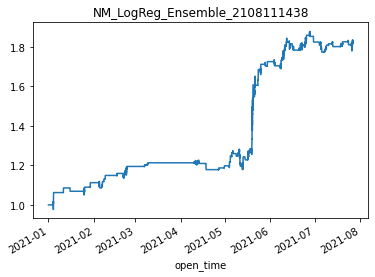

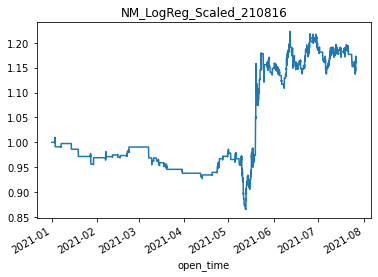

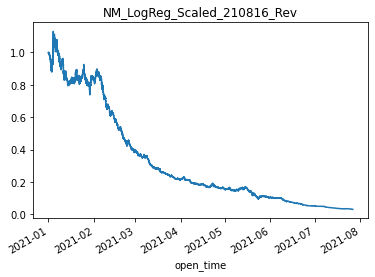

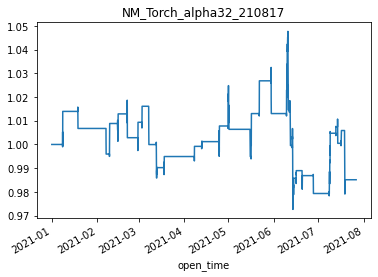

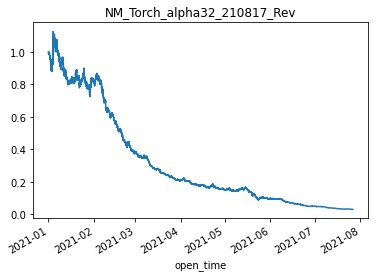

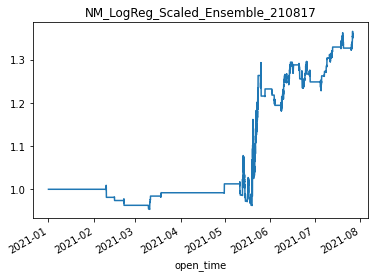

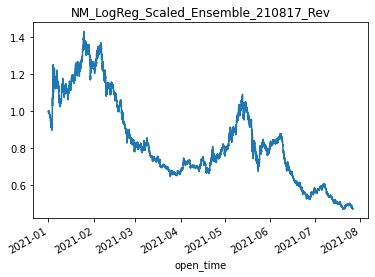

In [9]:
import matplotlib.pyplot as plt
for k,v in simulation_results.items():
    v[v['actual_action']!='none'].to_csv(f'./results/{k}.csv')
    fig, ax = plt.subplots()
    fig.patch.set_facecolor('white')
    ax.set_title(k)
    v.total_value.plot(figure=fig)

In [10]:
# Daily value
# daily_vals = {k:v[v.index.hour + v.index.minute == 0]['total_value'] for k,v in simulation_results.items()}
# daily_vals['NM_ETHBTC_RandomForest_1.47'].loc['2020'].to_csv('NM_ETHBTC_RandomForest_1.47_2020.csv')